# Tracking Pipeline

1. Collect and zip raw data 
2. Upload to DeepCell.org & Download annotations
3. Chop up images into manageable pieces
4. Track each of these movies and prepare Caliban input file
5. Load data into Caliban and correct tracks 
6. Retrain tracking model on Caliban output

In [1]:
# Import statements
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, random
import pathlib
import skimage as sk
import scipy as sp
from skimage.io import imread, imshow
from skimage.external.tifffile import TiffFile


## 3. Chop up images into manageable pices

Should take in directories of raw and annotated data  
Chop up each into sequeces of registered frames (matching raw and annotated movies)  
Store the output in an npz that the tracker can operate on (npz of 'X' and 'y')  

In [8]:
# Define the directories of interest
base_direc = '/data/data/cells/3T3/NIH/set0/deepcell_segmentations_v1/part_2'
source_direcs = ['raw', 'annotated_ws']
output_direc = '/data/data/cells/3T3/NIH/set0/deepcell_segmentations_v1/part_2/movies'

# Create output ditrectory, if necessary
#pathlib.Path(output_directory).mkdir(parents=True, exist_ok=True)

# Training directories are organized according to location within an image
# These can be tuned to limit the number of cells data curators see per frame
num_x = 7 # Define num of horizontal samples
num_y = 7 # Define num of vertical samples

# Define the percentage each image should overlap (in case the result will eventually be stiched back together)
overlap_perc = 0


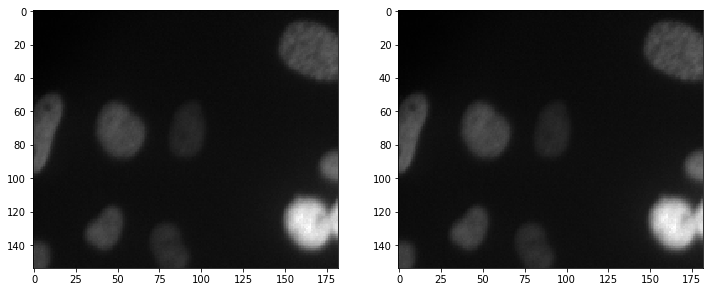

Correct? (y/n): y
Processing...
Cropped files saved to /data/data/cells/3T3/NIH/set0/deepcell_segmentations_v1/part_2/movies


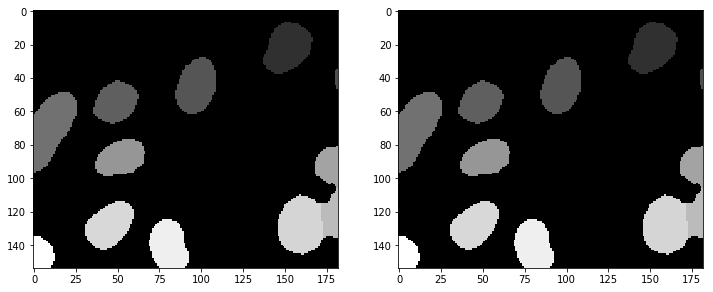

Correct? (y/n): y
Processing...
Cropped files saved to /data/data/cells/3T3/NIH/set0/deepcell_segmentations_v1/part_2/movies


In [9]:
import importlib
import pre_annotation_scripts.chop_into_overlapping_images
importlib.reload(pre_annotation_scripts.chop_into_overlapping_images)

trial = pre_annotation_scripts.chop_into_overlapping_images.chop_into_overlap_img(
                     num_of_sets = 1,
                     num_x = num_x, num_y=num_y,
                     base_direc = base_direc,
                     source_direcs = source_direcs,
                     output_direc = output_direc,
                     out_file_prefix = "s0p2",
                     overlap_perc = overlap_perc)
trial.crop_multiple_dir()
